In [88]:
import os
import pandas as pd
import numpy as np
import cv2

In [89]:
path = '/home/mr1142/Documents/Data/chest_xray'

In [90]:
os.listdir(path)

['__MACOSX', 'train', 'test', 'val', 'chest_xray']

In [91]:
for fold_1 in os.listdir(path):
    folders_inside_1 = []
    print(f'{fold_1}')
    try:
        folders_inside_1 = os.listdir(os.path.join(path, fold_1))
    except:
        print('', end = '')
    for fold_2 in folders_inside_1:
        folders_inside_2 = []
        print(f'----{fold_2}')
        try:
            folders_inside_2 = os.listdir(os.path.join(path, fold_1, fold_2))
        except:
            print('', end = '')
        if len(folders_inside_2) < 5:
            for fold_3 in folders_inside_2:
                folders_inside_3 = []
                print(f'--------{fold_3}')
                try:
                    folders_inside_3 = os.listdir(os.path.join(path, fold_1, fold_2, fold_3))
                except:
                    print('')
                print(len(folders_inside_3))
        else:
            print(len(folders_inside_2))

__MACOSX
----._chest_xray
----chest_xray
6
train
----PNEUMONIA
3875
----NORMAL
1341
test
----PNEUMONIA
390
----NORMAL
234
val
----PNEUMONIA
8
----NORMAL
8
chest_xray
----train
--------.DS_Store

0
--------PNEUMONIA
3876
--------NORMAL
1342
----test
--------.DS_Store

0
--------PNEUMONIA
390
--------NORMAL
234
----.DS_Store
----val
--------.DS_Store

0
--------PNEUMONIA
9
--------NORMAL
9


In [92]:
p = os.path.join(path, 'test')

In [93]:
normales = os.listdir(os.path.join(p, 'NORMAL'))
pneumo = os.listdir(os.path.join(p, 'PNEUMONIA'))

In [94]:
no = {'name': normales, 'type': [0]*len(normales)}
ne = {'name': pneumo, 'type': [1]*len(pneumo)}

In [95]:
for k, v in no.items():
    v.extend(ne[k])

In [96]:
df = pd.DataFrame(no)

In [97]:
df

,name,type
0,NORMAL2-IM-0233-0001.jpeg,0
1,IM-0016-0001.jpeg,0
2,NORMAL2-IM-0297-0001.jpeg,0
3,NORMAL2-IM-0252-0001.jpeg,0
4,NORMAL2-IM-0171-0001.jpeg,0
...,...,...
619,person91_bacteria_445.jpeg,1
620,person81_bacteria_396.jpeg,1
621,person61_virus_118.jpeg,1
622,person17_virus_48.jpeg,1


In [98]:
df.to_csv(save + 'true.csv', index = False)

In [86]:
save = '/home/mr1142/Documents/Data/prueba_class'
for folder in os.listdir(p):
    images = os.listdir(os.path.join(p, folder))
    for im in images:
        im = im[:-4]
        cv2.imwrite(os.path.join(save, im + '.png'), cv2.imread(os.path.join(p, folder, im)))

# RESULTADOS

In [152]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [163]:
import re

In [131]:
results = pd.read_csv(os.path.join(save, 'results.csv'))

In [132]:
results['true'] = 0

In [143]:
for i, name in enumerate(df.name):
    # print(results[results.name == name[:-5]])
    ix = results[results.name == name[:-5]].index
    # print(ix[0])
    results['true'][ix[0]] = df.type[i]

/tmp/ipykernel_30731/1274469056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['true'][ix[0]] = df.type[i]


In [144]:
results

,name,normal,moderado,severo,true
0,person117_bacteria_553,0.999972,0.000028,2.678677e-09,1
1,person141_bacteria_677,0.999979,0.000021,7.674886e-10,1
2,person100_bacteria_477,0.990465,0.009512,2.227150e-05,1
3,person111_bacteria_534,0.999988,0.000012,5.645454e-10,1
4,person1669_virus_2884,0.883430,0.115756,8.137595e-04,1
...,...,...,...,...,...
619,NORMAL2-IM-0328-0001,0.252357,0.736711,1.093204e-02,0
620,NORMAL2-IM-0251-0001,0.575702,0.423080,1.218000e-03,0
621,NORMAL2-IM-0059-0001,0.992739,0.007260,1.418116e-06,0
622,IM-0030-0001,0.951427,0.048536,3.704735e-05,0


In [173]:
ix = [i for i in results.index if not re.search('bacteria', results.name[i])]
len(ix)

382

In [174]:
results_2 = results.loc[ix]

In [175]:
def AUC_plot(fpr, tpr, thresholds, auc):
    fig, ax = plt.subplots()
    i = np.argmax(tpr-fpr)
    th = thresholds[i]
    x = fpr[i]
    y = tpr[i]
    ax.plot(fpr,tpr, "g-", label="AUC="+str(round(auc, 2)))
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    try:
        ax.plot([x, x], [0, y], "r:")
        ax.plot([0, x], [y, y], "r:")
    except:
        print('plot except')
    ax.plot([x], [y], "ro", label="th="+str(round(th,2))) 
    ax.legend(loc=4)
    return fig

In [176]:
fpr, tpr, auc_thresholds = metrics.roc_curve(results_2.true, results_2.normal)
auc = metrics.auc(fpr, tpr)

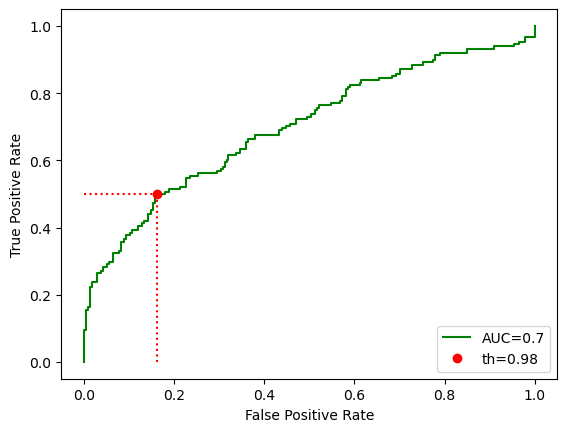

In [177]:
a = AUC_plot(fpr, tpr, auc_thresholds, auc)